# **Exploratory Data Analysis on Online Course Enrollment Data**


----


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [3]:
# also set a random state
rs = 123

### Load and explore the dataset


First, let's load the datasets as `Pandas` dataframes and start some basic exploratory data analysis tasks on them.


In [4]:
course_df = pd.read_csv('course_genre.csv')
ratings_df = pd.read_csv('ratings.csv')

Let's first take a look at the datasets.

In [5]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [34]:
ratings_df.head(10)

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3
5,1390655,ST0101EN,5
6,367075,DS0301EN,3
7,1858700,CC0101EN,4
8,600100,BD0211EN,3
9,623377,DS0105EN,3


In [7]:
print('course_df.shape:', course_df.shape,'; ratings_df.shape:', ratings_df.shape)

course_df.shape: (307, 16) ; ratings_df.shape: (233306, 3)


Let's also check its columns/features name:


In [8]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

We can see from the above cell output that the columns represent some metadata about a course such as its id, title, and genres. We can see that the course genres are some popular topics related to machine learning, databases, app developments, etc.


We can also check how many unique courses we have in this dataset:


In [9]:
course_df.shape[0]

307

In [10]:
course_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

As we can see, the `COURSE_ID` and `TITLE` are `str` datatypes and all the course genres are binary/int datatypes. Any genre column with value 1 means the course is associated with the course genre while 0 means the course is not.


For example, the following course `accelerating deep learning with gpu` is associated with genres `Python`, `MachineLearning`, and `DataScience`


In [11]:
course_df.iloc[1, ]

COURSE_ID                                     ML0122EN
TITLE              accelerating deep learning with gpu
Database                                             0
Python                                               1
CloudComputing                                       0
DataAnalysis                                         0
Containers                                           0
MachineLearning                                      1
ComputerVision                                       0
DataScience                                          1
BigData                                              0
Chatbot                                              0
R                                                    0
BackendDev                                           0
FrontendDev                                          0
Blockchain                                           0
Name: 1, dtype: object

Next, let's focus on the course title column by trying to determine keywords in the titles. Those keywords in the titles may give us a more intuitive summary of what kind of courses we have in the dataset.


### Plot a Word Cloud from Course Titles


First, let's join all the title values into one string, then we can conveniently get a wordcloud from the big string:


In [12]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))

In [13]:
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop ybrid cloud conference  ai pipelines lab dataops methodology data   ai

We also want to filter common stop words and some less meaningful words:


In [14]:
# English Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

Then, we create a ```WordCloud``` object and generate ```wordcloud``` from the titles.


In [15]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)

In [16]:
wordcloud.generate(titles)

We can use `plt.imshow()` method to visualize the generated wordcloud:


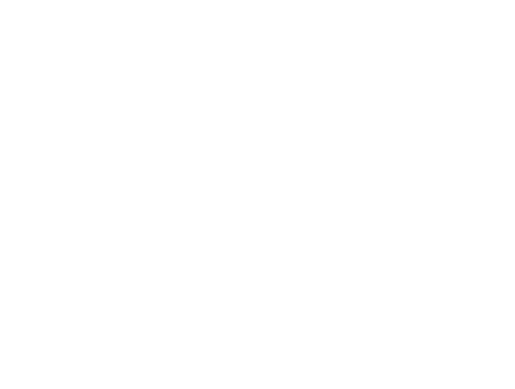

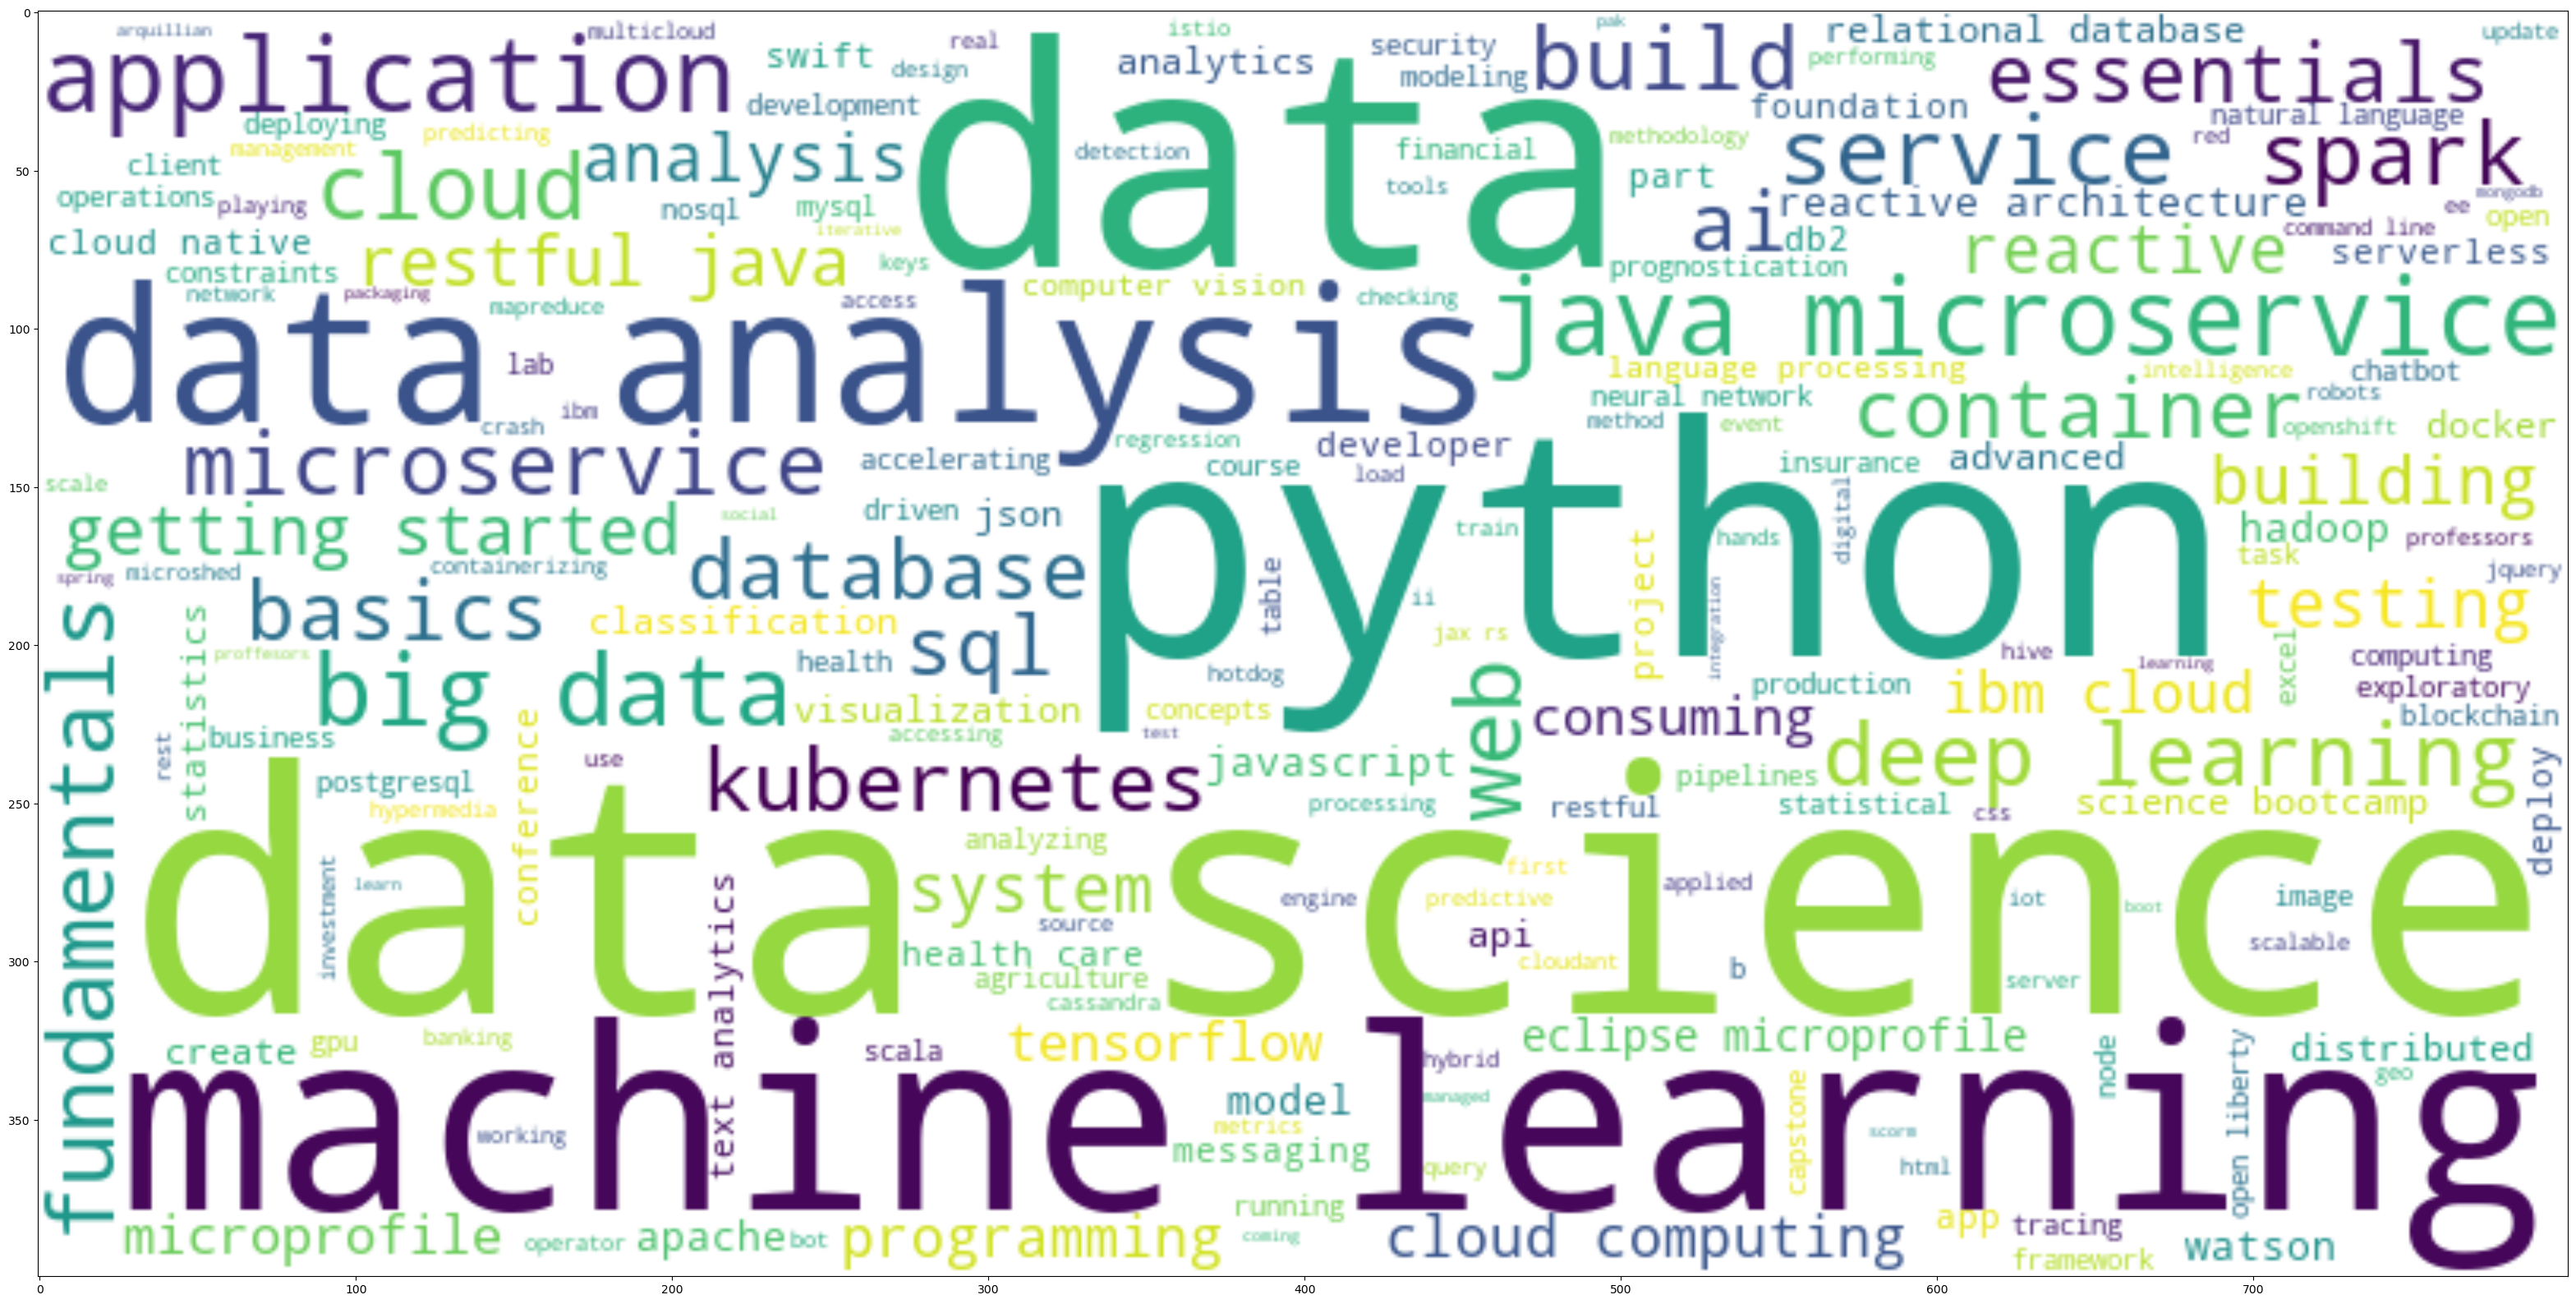

In [17]:
# Disable axis display
plt.axis("off")
# Create a new figure with a specified size
plt.figure(figsize=(40,20))
# Adjust the layout to ensure tight spacing
plt.tight_layout(pad=0)
# Display the word cloud image with bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')
# Show the plot
plt.show()

As we can see from the ```wordcloud```,  there are many popular IT related keywords such as python, data science, machine learning, big data, ai, tensorflow, container, cloud, etc. By looking at these keywords, we should have a general understanding that the courses in the dataset are focused on demanding IT skills.


Next, we need to perform some more detailed analysis on the course dataset.


### Analyze Course Genres


In [18]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

Given all the course genres, now let's calculate the course count for each genre.


In [19]:
course_count = course_df[genres].sum().sort_values(ascending=False)
course_count = pd.DataFrame(course_count,index=None, columns=['count'])
course_count 

,count
BackendDev,78
MachineLearning,69
Database,60
DataAnalysis,56
DataScience,38
CloudComputing,37
BigData,36
Python,28
FrontendDev,19
Containers,17


We can also visualize course genre counts using a bar chart:


In [20]:
course_count.index

Index(['BackendDev', 'MachineLearning', 'Database', 'DataAnalysis',
       'DataScience', 'CloudComputing', 'BigData', 'Python', 'FrontendDev',
       'Containers', 'R', 'ComputerVision', 'Chatbot', 'Blockchain'],
      dtype='object')

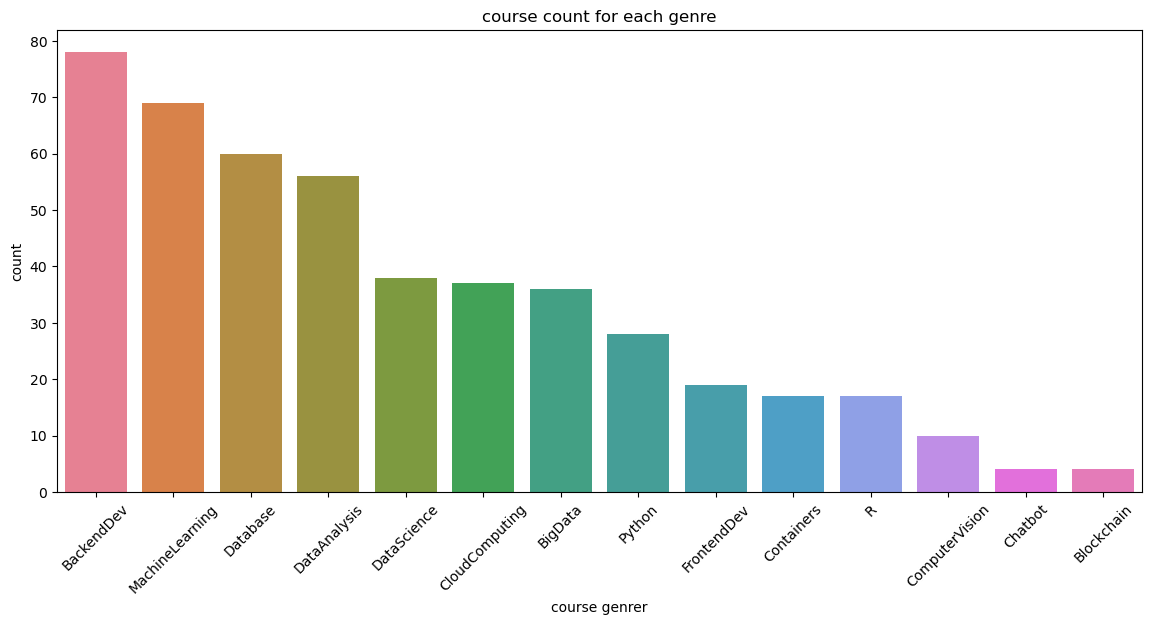

In [21]:
plt.figure(figsize=(14, 6))
sns.barplot(data=course_count, x=course_count.index, y=course_count['count'], hue=course_count.index)

plt.title('course count for each genre')
plt.xticks(course_count.index, rotation=45)
plt.ylabel('count')
plt.xlabel('course genrer')

plt.show()

###  Analyze Course Enrollments


Let's first take a look at the course enrollments dataset.


In [22]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


This dataset contains three colums, `user` representing a unique user id, `item` representing a course id, and `rating` representing the ratings given by the user.


In [23]:
ratings_df['rating'].unique()

array([5, 3, 4])

The **rating** column consists of three potential values: 

- A rating of <code>5</code> signifies that users who have enrolled in the course find it excellent and have given it the highest rating, thus recommending it to other learners. 

- A rating of <code>4</code>, indicates that the enrolled users perceive the course as good and will recommend to the other learners,but suggest minor improvements. 

- A rating of <code>3</code>indicates that enrolled users find the course below expectations and need significant modifications.


Let's see how many ratings we have in the dataset:


In [24]:
ratings_df.shape[0]

233306

We have 233306 enrollments. In fact, each user is likely to interact with multiple items so let's find the rating counts for each user:


In [25]:
user_rating = ratings_df.groupby('user').size()
user_rating

user
2          61
4          44
5          59
7           1
8           3
           ..
2102054     8
2102356     1
2102680    11
2102983     1
2103039     1
Length: 33901, dtype: int64

In [26]:
user_rating.describe()


count    33901.000000
mean         6.881980
std          5.823548
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         61.000000
dtype: float64

We can also get a histogram showing the enrollment distributions, e.g., how many users rated just 1 item or how many rated 10 items, etc.


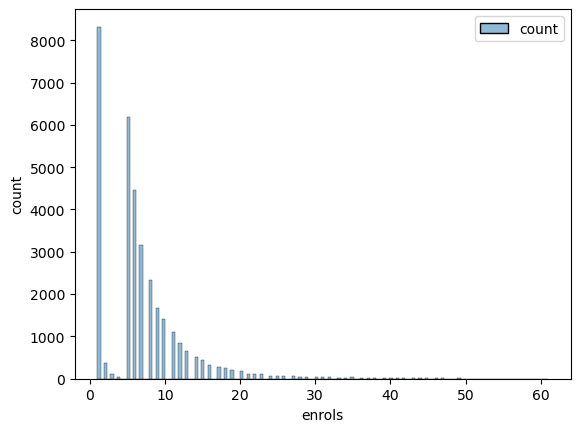

In [27]:
user_rating = pd.DataFrame(user_rating, columns=['count'])
user_rating.count

sns.histplot(data=user_rating) 
plt.ylabel('count')
plt.xlabel('enrols')
plt.show()

We can see that more than 8000 learners rated only one course.

### Find the Top-20 Most Popular Courses


Now we know how many items each user rated. Let's see the most popular 20 courses, i.e., items with the most rating counts.


In [28]:
course_rating = ratings_df.groupby('item').size().sort_values(ascending=False).head(20)
course_rating = pd.DataFrame(course_rating, columns=['enrolls'])


In [29]:
course_rating = course_rating.rename_axis('COURSE_ID').reset_index()
course_rating

,COURSE_ID,enrolls
0,PY0101EN,14936
1,DS0101EN,14477
2,BD0101EN,13291
3,BD0111EN,10599
4,DA0101EN,8303
5,DS0103EN,7719
6,ML0101ENv3,7644
7,BD0211EN,7551
8,DS0105EN,7199
9,BC0101EN,6719


Now we only see the item IDs which do not indicate what kind of courses they are. To make it more clear, we need to join the course titles in the course metadata dataset (`course_df`) so that we can identify what the most popular courses are immediately:


In [30]:
top20_df = pd.merge(course_rating, course_df[['COURSE_ID', 'TITLE']], on = 'COURSE_ID')
top20_df

,COURSE_ID,enrolls,TITLE
0,PY0101EN,14936,python for data science
1,DS0101EN,14477,introduction to data science
2,BD0101EN,13291,big data 101
3,BD0111EN,10599,hadoop 101
4,DA0101EN,8303,data analysis with python
5,DS0103EN,7719,data science methodology
6,ML0101ENv3,7644,machine learning with python
7,BD0211EN,7551,spark fundamentals i
8,DS0105EN,7199,data science hands on with open source tools
9,BC0101EN,6719,blockchain essentials


It seems that those popular courses take a huge amount of total ratings. Let's find the exact percentage.


In [31]:
# Get the total course enrollments again
total = ratings_df.shape[0]
total

233306

In [32]:
top20 = top20_df['enrolls'].sum()
top20

147688

In [33]:
print(f"Percentage of the top course enrollments {round((top20 * 100)/total, 2)}%")

Percentage of the top course enrollments 63.3%
